In [24]:
import os
import re
import sys
import sklearn as skl

import matplotlib.pyplot as plt

import numpy as np

import pandas as pd

import sklearn.cluster

import glob

import dataproc

from sklearn.cluster import KMeans

from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
import dataproc.operations

from dataproc.operations.hitp import bayesian_block_finder

from dataproc.operations.hitp import fit_peak

from dataproc.operations.hitp import load_image

from feature_extract import feat_extr

from data_grid import DataGrid

from data_grid_TiNiSn import DataGrid, DataGrid_TiNiSn_500C, DataGrid_TiNiSn_600C

from dataproc.operations.peakShapes import voigtFn

from peak_removal import peak_rem

In [3]:
# Load data from the original XRD data gotten from the experiment
ccc = pd.read_csv("C:/Users/oluwa/Downloads/TiNiSn_500C_Y20190218_14x14_t60_scan1.csv", header= 1)

In [4]:
#This exracts the features from the (800,2) by 177 dataset
# This has been run already,there is no need to run again. It takes a long time to run!

#param = feat_extr()

In [5]:
#fit_peak?

In [6]:
# Load this important class

dataGrid = DataGrid_TiNiSn_500C()

Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully


In [8]:
#np.empty?

In [9]:
#dataGrid.get_data_array?

In [10]:
dataI = np.empty(shape=(dataGrid.size,dataGrid.data_length))
for i in range(dataGrid.size):  
        dataI[i] = dataGrid.data[i+1][:,1]

In [25]:
# Loading important class again 
# Check dataGrid.py for more info

peakGrid = DataGrid("C:/Users/oluwa/Downloads/","TiNiSn_500C_Y20190218_14x14_t60_(?P<num>.*?)_bkgdSub_1D_params.csv")

Loading Data from: C:/Users/oluwa/Downloads/
# WARNING: missing data files
Data Loaded Succesfully


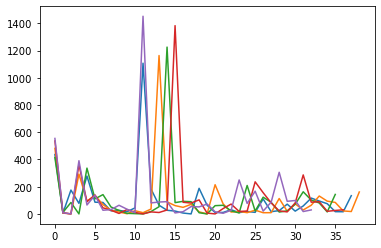

In [26]:
# This actually is not important, I was just playing around with plots

fig,ax = plt.subplots()
for i in range(1,6):
    
    ax.plot(range(0,len(peakGrid.data[i])), peakGrid.data[i][:,0])


In [27]:
max_peaks = 0
for k in peakGrid.data.keys():
    max_peaks = max(max_peaks,len(peakGrid.data[k]))
print("Maximum number of peaks: ",max_peaks)

Maximum number of peaks:  39


In [28]:
ccc.columns

Index(['    #', '   Plate Y', '   Plate X', '  Seconds', '       i0',
       '       i1', '      mon', '    bstop', '  LaserRf', '      CH6',
       '      CH7', '     TEMP', '   marccd', '    ICRxT', '    OCRxT',
       '     ROI1', '     ROI2', '     ROI3', '     ROI4', '     ROI5',
       '     ROI6', '     ROI7', '     ROI8', '     ROI9', '    ROI10',
       '    RIO11', '    ROI12', '    ROI13', '      SWX', '     CCD1',
       '    CTEMP', '    Timer', '      pd1', '      pd2', '      pd3',
       '      pd4', '      pd5', '      pd6', '      pd7', '      pd8',
       '      pd9', '     pd10', '     pd11', '     pd12', '     pd13',
       '     pd14', '     pd15', '     pd16', '    PRESS', '   lvdt11',
       '   lvdt12', '   lvdt21', '   lvdt22', '   lvdt31', '   lvdt32',
       '   lvdt41', '   lvdt42', '   CTEMPB', '  X3_ROI1', '  X3_ROI2',
       '  X3_ROI3', '  X3_ROI4', '  X3_ROI5', '  X3_ROI6', '  X3_ROI7',
       '  X3_ROI8'],
      dtype='object')

In [33]:
# This strips away the spaces in the columns names. Super cool right :)

ccc = ccc.rename(columns=lambda x: x.strip())

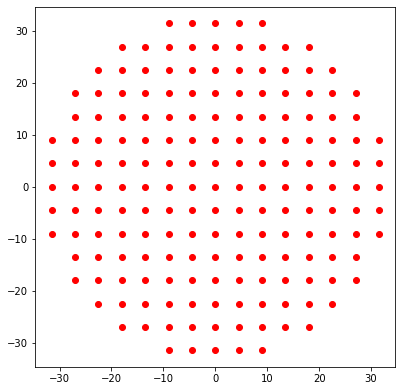

In [34]:
# Just trying out how to make a wafer plot from the "ccc" dataset

fig=plt.figure(figsize=(5,5))
ax=fig.add_axes([0,0,1,1])
ax.scatter(ccc['Plate X'], ccc['Plate Y'], color='r')
#ax.scatter(ccc['   Plate X'][5:99],ccc.iloc[5:99,1],color='b')
#ax.scatter(ccc.iloc[99:,0],ccc.iloc[99:,1],color='g')
#ax.scatter(ccc.iloc[:,0], ccc.iloc[:,1], color='r')

In [35]:
# Convert the datafram "ccc" to a numpy array
cc=ccc.to_numpy()

In [36]:
np.shape(ccc.iloc[0:,0])

(177,)

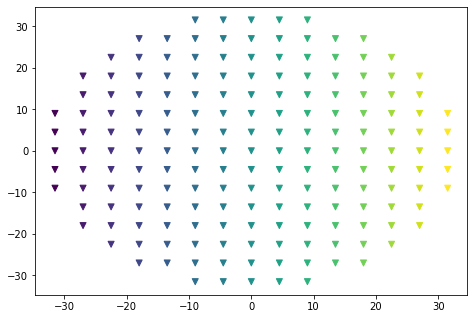

In [18]:
#Wafer plot from Robert's idea

ax=plt.figure().add_axes([0,0,1,1])
#ax=fig.add_axes([0,0,1,1])
colors = ccc['Plate X']
ax.scatter(ccc['Plate X'], ccc['Plate Y'], c=colors, marker='v')

# Just trying stuffs in order to write the reshape() script

In [19]:
pca = PCA(n_components=25)
X_red = pca.fit_transform(dataGrid.get_data_array())

(177, 800)


In [20]:
np.ones(shape=(2,2))

array([[1., 1.],
       [1., 1.]])

In [16]:
path = "C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/"
regex = """TiNiSn_500C_Y20190218_14x14_t60_(?P<num>.*?)_bkgdSub_1D.csv"""
   
# Pull data from file
files = os.listdir(path)
#regex to parse grid location from file
pattern = re.compile(regex)
if len(files) == 0:
    print("no files in path")
    sys.exit()
    

In [17]:
pattern

re.compile(r'TiNiSn_500C_Y20190218_14x14_t60_(?P<num>.*?)_bkgdSub_1D.csv',
re.UNICODE)

In [19]:
match=pattern.match(files[6])
print(match)

<re.Match object; span=(0, 51), match='TiNiSn_500C_Y20190218_14x14_t60_0003_bkgdSub_1D.c>


In [20]:
num = match.group('num')

In [21]:
print('Params_TiNiSn_500C_' + str(num) +'.csv')

Params_TiNiSn_500C_0003.csv


In [22]:
files[3] + 'extr_param'

'TiNiSn_500C_Y20190218_14x14_t60_0001_bkgdSub_1D.csvextr_param'

In [28]:
params=peak_rem()

20


In [29]:
type(params)

dict

In [30]:
import Agglo_cluster

In [31]:
xx = 0

In [32]:
if not xx:
    print('It is true')

It is true


In [33]:
if 3%2 !=0:
    print("not")

not


In [34]:
range(len(params[4])//4)
k=45

In [35]:
print("Length of datapoint %d not a multiple of 4" %k)

Length of datapoint 45 not a multiple of 4


In [36]:
data = {}
for i in range(1,178):
    data[i]=np.array(params[i][params[i].columns[0:8]])

In [37]:
len(data.keys())

177

In [38]:
reshape_dic={}
for k in range(0,len(data.keys())):
    reshape=[]
    for i in range(len(data[k+1])//4):
        if len(data[k+1])%4 != 0:
            kk = k+1
            print('Length of datapoint %d not a multiple of 4' %kk)
            continue
        reshape.append(data[k+1][4*i:(4*i)+4])
    reshape_dic[k+1] = reshape

In [39]:
np.shape(reshape_dic[1])

(5, 4, 8)

In [40]:
pd.read_csv('C:/Users/oluwa/Jupyter notebooks/TiNiSn_500C_Y20190218_14x14_t60_0001_bkgdSub_1D_extr_param.csv',header=None)

,0,1,2,3,4,5,6,7,8
0,1.615626,-6.388832,2.844322,3.581650e-02,4.452701e-02,0.141695,0.718186,9.948530e-15,1.615626
1,1.723000,16.070074,1.651465,5.250001e-02,5.250001e-02,0.188867,3.998542,4.930694e-13,1.723000
2,1.540348,-4.946970,2.129331,3.948599e-10,5.026509e-02,0.100530,0.270698,9.145456e-15,1.540348
3,1.582392,-3.104663,0.043172,9.151598e-03,7.286117e-36,0.021550,-0.608807,1.046398e-10,1.582392
4,1.837243,-3.611703,11.132749,6.560822e-03,5.177472e-03,0.021659,10.016998,4.759217e-08,1.837243
...,...,...,...,...,...,...,...,...,...
83,5.260003,91.840756,6.207355,5.107408e-06,4.030861e-02,0.080616,34.069182,2.660945e-08,5.260003
84,5.493748,-0.249102,0.237914,1.107728e-03,6.128202e-03,0.012836,0.080452,1.875935e-13,5.493748
85,5.479107,12.326311,0.055706,6.248039e-03,5.267492e-03,0.021091,0.347091,2.641422e-13,5.479107
86,5.486028,-0.439469,0.034920,3.097463e-03,5.351210e-03,0.014603,0.012530,1.485433e-15,5.486028


In [41]:
reshape_dic[1][1]

array([[ 2.13673617e+00, -1.43472090e+01,  9.08153446e+00,
         1.24906539e-02,  1.24936439e-02,  4.49390369e-02,
         3.69428426e+00,  2.16223041e-12],
       [ 2.23129306e+00, -6.01784311e+00,  2.66870674e+00,
         2.76406734e-03,  8.47537893e-03,  1.93694461e-02,
         1.61469870e+00,  5.51616025e-11],
       [ 2.25213604e+00,  1.05815540e+01,  3.25993905e+00,
         6.67613430e-03,  1.16905904e-02,  3.17274792e-02,
         4.32946867e+00,  2.61180750e-08],
       [ 3.00220507e+00, -2.73733495e+02,  3.80035767e+01,
         7.33629836e-03,  7.78837933e-03,  2.70470023e-02,
        -1.91091167e+01,  5.60779229e-11]])

# Reshape function

In [37]:
# Reshape() is an upgraded peak_rem(); for a certain datapoint/XRD pattern it separates each peak into 4 curves

from reshape import reshape

In [41]:
reshape_dic=reshape()

20
(22, 32)
(23, 32)
(21, 32)
(21, 32)
(18, 32)
(24, 32)
(26, 32)
(24, 32)
(24, 32)
(20, 32)
(18, 32)
(18, 32)
(17, 32)
(24, 32)
(21, 32)
(20, 32)
(20, 32)
(22, 32)
(22, 32)
(21, 32)
(18, 32)
(15, 32)
(19, 32)
(25, 32)
(26, 32)
(21, 32)
(22, 32)
(21, 32)
(20, 32)
(18, 32)
(19, 32)
(19, 32)
(18, 32)
(12, 32)
(19, 32)
(22, 32)
(17, 32)
(20, 32)
(21, 32)
(24, 32)
(22, 32)
(19, 32)
(19, 32)
(17, 32)
(14, 32)
(12, 32)
(11, 32)
(15, 32)
(13, 32)
(15, 32)
(16, 32)
(18, 32)
(22, 32)
(20, 32)
(22, 32)
(23, 32)
(21, 32)
(17, 32)
(13, 32)
(11, 32)
(11, 32)
(12, 32)
(12, 32)
(15, 32)
(17, 32)
(21, 32)
(17, 32)
(17, 32)
(17, 32)
(20, 32)
(21, 32)
(20, 32)
(14, 32)
(13, 32)
(11, 32)
(11, 32)
(12, 32)
(14, 32)
(16, 32)
(21, 32)
(19, 32)
(17, 32)
(17, 32)
(17, 32)
(17, 32)
(20, 32)
(17, 32)
(16, 32)
(12, 32)
(11, 32)
(11, 32)
(13, 32)
(16, 32)
(19, 32)
(20, 32)
(19, 32)
(15, 32)
(14, 32)
(13, 32)
(14, 32)
(10, 32)
(17, 32)
(14, 32)
(13, 32)
(12, 32)
(13, 32)
(16, 32)
(19, 32)
(23, 32)
(18, 32)
(18, 32

In [42]:
reshape_dic.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177])

In [43]:
data1 = pd.read_csv('C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/TiNiSn_500C_Y20190218_14x14_t60_0001_bkgdSub_1D.csv',header=None)
data1.columns

Int64Index([0, 1], dtype='int64')

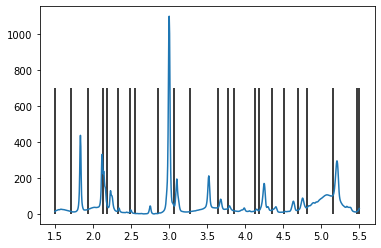

In [44]:
blocks1 = bayesian_block_finder(data1[0], data1[1])
#plt.plot(data1[0],data1[1])
fig, ax = plt.subplots()
ax.plot(data1[0], data1[1])
ax.vlines(data1[0].loc[blocks1], 0, 700)


In [45]:
reshape1=reshape_dic[1]

In [46]:
bb1 = list(reshape1[1][0:5])
bb2 = list(reshape1[1][8:13])
bb3 = list(reshape1[1][16:21])
bb4 = list(reshape1[1][24:29])
bb = list(reshape1[1][0:5])+list(reshape1[1][8:13])+list(reshape1[1][16:21])+list(reshape1[1][24:29])

In [47]:
voigtFn?

In [48]:
p1 = voigtFn(np.linspace(0,5,100),*bb1)
p2 = voigtFn(np.linspace(0,5,100),*bb2)
p3= voigtFn(np.linspace(0,5,100),*bb3)
p4= voigtFn(np.linspace(0,5,100),*bb4)
p = voigtFn(np.linspace(0,5,100),*bb)

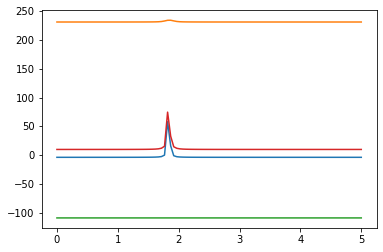

In [49]:
plt.plot(np.linspace(0,5,100),p1)
plt.plot(np.linspace(0,5,100),p2)
#plt.plot(np.linspace(0,5,100),p3)
plt.plot(np.linspace(0,5,100),p4)
plt.plot(np.linspace(0,5,100),p)